In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Dataset

In [2]:
dataset_path = "./dataset/"

train_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    output_sequence_length=48000,
    ragged=False,
    label_mode="categorical",
    labels="inferred",
    sampling_rate=None,
    seed=59
)

validation_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    output_sequence_length=48000,
    ragged=False,
    label_mode="categorical",
    labels="inferred",
    sampling_rate=None,
    seed=59
)

Found 1998 files belonging to 5 classes.
Using 1599 files for training.
Found 1998 files belonging to 5 classes.
Using 399 files for validation.


Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=80, strides=16, activation="relu", input_shape=(48000, 1)),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 2996, 32)       │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 749, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 747, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 186, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 184, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 44, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         3,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,781 (108.52 KB)

 Trainable params: 27,781 (108.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Train

In [10]:
history = model.fit(
    train_data, 
    validation_data=validation_data, 
    epochs=30)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 107ms/step - accuracy: 0.2255 - loss: 1.5901 - val_accuracy: 0.3759 - val_loss: 1.4393
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 125ms/step - accuracy: 0.4034 - loss: 1.4498 - val_accuracy: 0.5313 - val_loss: 1.1865
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.5552 - loss: 1.1310 - val_accuracy: 0.6316 - val_loss: 0.9434
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - accuracy: 0.6646 - loss: 0.8691 - val_accuracy: 0.7093 - val_loss: 0.7376
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 55s 139ms/step - accuracy: 0.7183 - loss: 0.7446 - val_accuracy: 0.7368 - val_loss: 0.7018
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 54s 135ms/step - accuracy: 0.7590 - loss: 0.6372 - val_accuracy: 0.7193 - val_loss: 0.8979
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 54s 134ms/step - accuracy: 0.7683 - loss: 0.5997 - val_accuracy: 0.7845 - val_loss: 0.6015
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 54s 135ms/step - accuracy: 0.8106 - loss: 0

In [11]:
model.save("weights/audio_classification.h5")

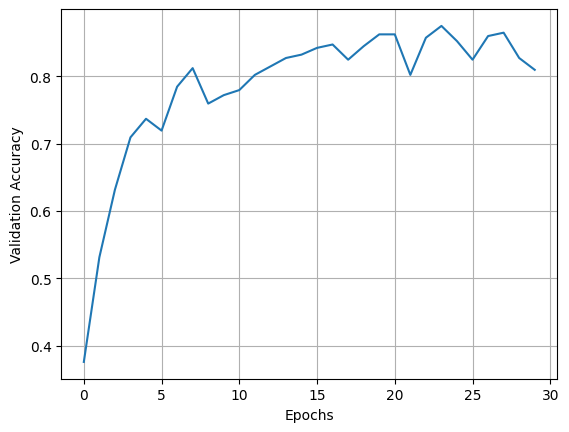

In [12]:
plt.plot(history.history["val_accuracy"])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()
plt.show()

In [13]:
loss , accuracy = model.evaluate(validation_data)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8223 - loss: 0.8266
validation loss: 0.8895110487937927
validation accuracy: 0.8095238208770752
